In [57]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

In [40]:
# create df
 
df = pd.read_csv("Month_Value_1 - Month_Value_1.csv")

df[df.columns[0]] = pd.to_datetime(df[df.columns[0]])
df

df.rename(columns={df.columns[0]: 'Date', df.columns[1]: 'Value'}, inplace=True)
# Set 'Date' as the index
df.set_index('Date', inplace=True)
df.head(5)

,Value,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Date,,,,
2015-01-01,16010072.12,12729.0,1257.763541,30024676.0
2015-01-02,15807587.45,11636.0,1358.507000,30024676.0
2015-01-03,22047146.02,15922.0,1384.697024,30024676.0
2015-01-04,18814583.29,15227.0,1235.606705,30024676.0
2015-01-05,14021479.61,8620.0,1626.621765,30024676.0


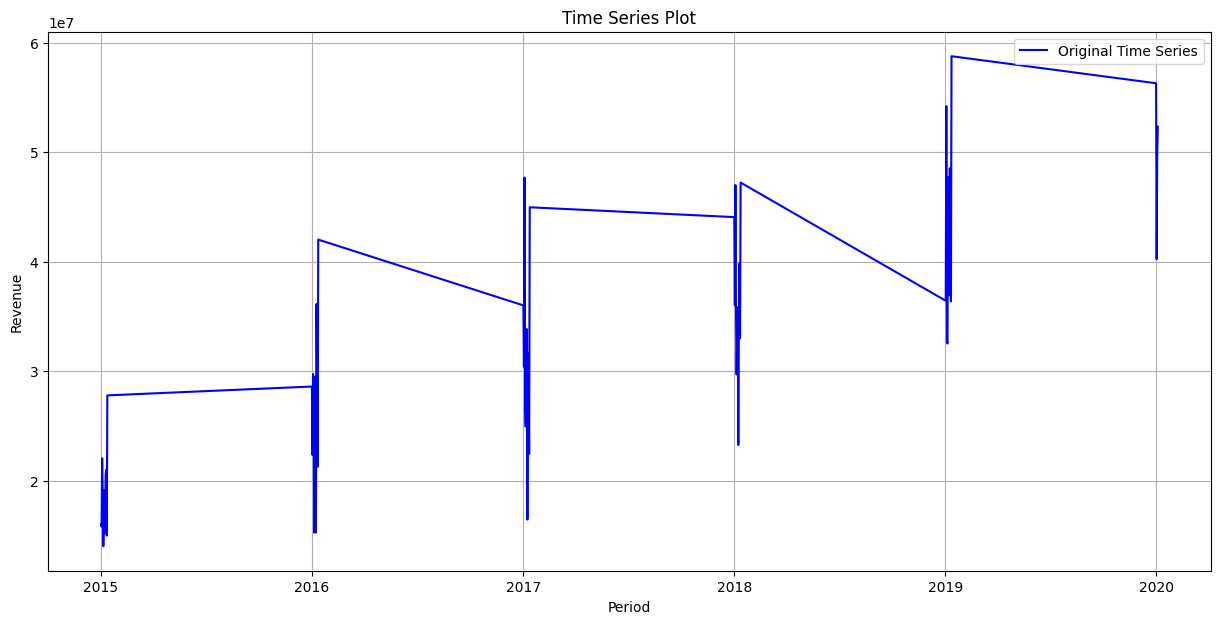

In [41]:
# Plot the time series
plt.figure(figsize=(15, 7))
plt.plot(df['Value'], color='blue', label='Original Time Series')
plt.title("Time Series Plot")
plt.xlabel("Period")
plt.ylabel("Revenue")
plt.legend()
plt.grid()
plt.show()


In [53]:

df = df.dropna()
df

,Value,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Date,,,,
2015-01-01,16010072.12,12729.0,1257.763541,30024676.0
2015-01-02,15807587.45,11636.0,1358.507000,30024676.0
2015-01-03,22047146.02,15922.0,1384.697024,30024676.0
2015-01-04,18814583.29,15227.0,1235.606705,30024676.0
2015-01-05,14021479.61,8620.0,1626.621765,30024676.0
...,...,...,...,...
2019-01-12,58756473.66,38069.0,1543.420464,29878525.0
2020-01-01,56288300.87,27184.0,2070.640850,29044998.0
2020-01-02,40225243.26,23509.0,1711.057181,29044998.0


In [54]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Test Results:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is NOT stationary.")

adf_test(df['Value'])

ADF Test Results:
ADF Statistic: -0.2691489373291113
p-value: 0.9297615377352489
Critical Values:
	1%: -3.562878534649522
	5%: -2.918973284023669
	10%: -2.597393446745562
The series is NOT stationary.


In [58]:
# Differencing to make the series stationary (if needed)
df['Value_Diff'] = df['Value'].diff().dropna()

# ADF test after differencing
print("\nADF Test after Differencing:")
adf_test(df['Value_Diff'].dropna())


ADF Test after Differencing:
ADF Test Results:
ADF Statistic: -5.604330112909441
p-value: 1.2441377990599668e-06
Critical Values:
	1%: -3.562878534649522
	5%: -2.918973284023669
	10%: -2.597393446745562
The series is stationary.


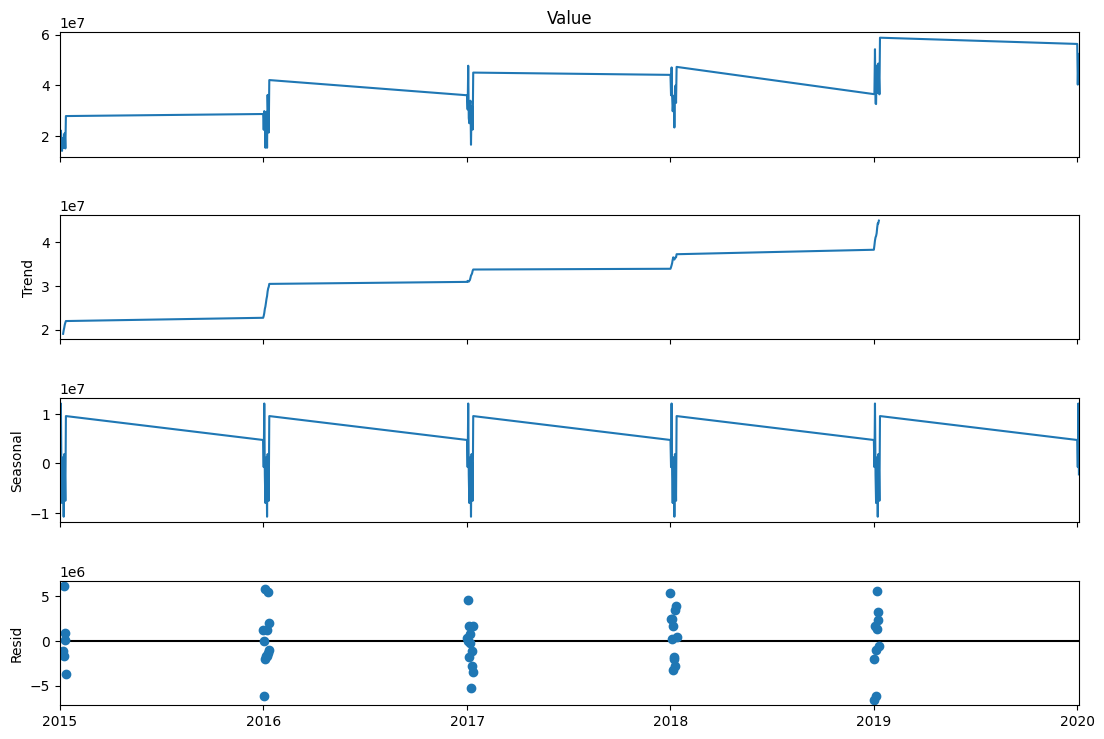

In [59]:
decomposition = seasonal_decompose(df['Value'], model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

In [60]:
# Fit ARIMA model
order = (1, 1, 1)  # Change as needed based on ACF/PACF analysis
model = ARIMA(df['Value'], order=order)
model_fit = model.fit()

# Print model summary
print("\nARIMA Model Summary:")
print(model_fit.summary())


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   64
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1093.553
Date:                Wed, 12 Mar 2025   AIC                           2193.106
Time:                        19:44:16   BIC                           2199.535
Sample:                             0   HQIC                          2195.634
                                 - 64                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1369      0.213     -0.642      0.521      -0.555       0.281
ma.L1         -0.6917      0.181     -3.830      0.000      -1.046      -0.338
sigma2      9.126e+13        n

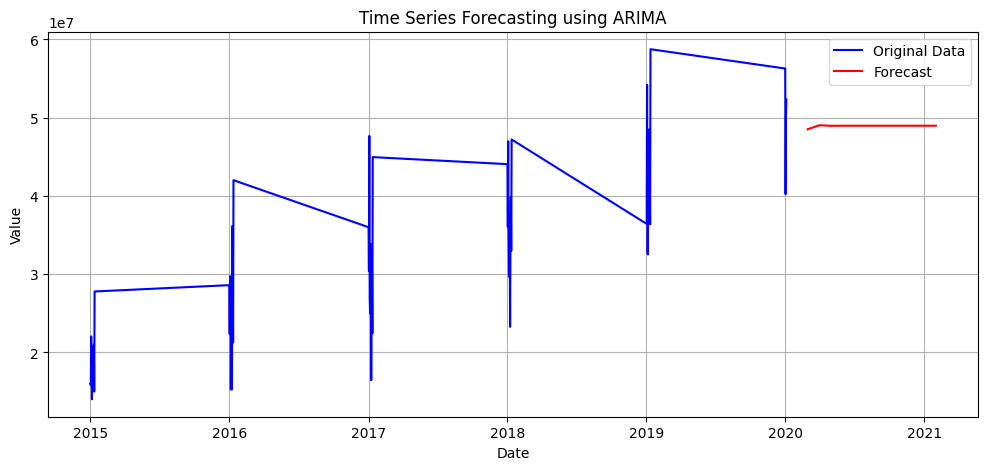

In [61]:
# Forecast the next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Value'], label="Original Data", color='blue')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, label="Forecast", color='red')
plt.title("Time Series Forecasting using ARIMA")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()